<a href="https://colab.research.google.com/github/saurabhlalsaxena/Langchain-Coding-Assistant/blob/main/Coding_assistant_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Up

In [1]:
!pip install -q -U langchain-cli langchain langchain_core langgraph langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB

In [2]:
!pip install -q langchainhub

In [3]:
!pip install -q openai langchain_openai langchain-anthropic langchain-mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.5/891.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00


In [4]:
!pip install -q langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 1.6 MB/s eta 0:00:00


In [5]:
!pip install -q duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.9 MB/s eta 0:00:00


In [7]:
import os
import openai
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
os.environ["MISTRAL_API_KEY"] = userdata.get('MISTRAL_API_KEY')

In [9]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = f"Coding Assistant"

In [10]:
mkdir projects

# React Agent

In [11]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic

from langchain.tools import BaseTool, StructuredTool, tool
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.tools import DuckDuckGoSearchRun

@tool
def create_doc(thread_id: str, filename: str) -> str:
    """
    Create a blank document in a folder within the projects directory.

    Args:
    thread_id (str): The ID of the thread, used to create a subfolder.
    filename (str): The name of the file to be created.

    Returns:
    str: The full path of the created file.
    """
    # Create the full file path
    file_path = os.path.join("projects", thread_id, filename)

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Create an empty file
    with open(file_path, 'w') as f:
        pass  # This creates an empty file

    return file_path

@tool
def append_to_doc(thread_id: str, filename: str, content: str) -> str:
    """
    Append text to an existing document in the specified thread folder.

    Args:
    thread_id (str): The ID of the thread, used to locate the subfolder.
    filename (str): The name of the file to append to.
    content (str): The text content to append to the file.

    Returns:
    str: The full path of the updated file.
    """
    file_path = os.path.join("projects", thread_id, filename)

    if not os.path.exists(file_path):
        return FileNotFoundError(f"The file {filename} does not exist in thread {thread_id}")

    with open(file_path, 'a') as f:
        f.write(content)

    return file_path

@tool
def folder_exists(thread_id: str) -> bool:
  """
  Check if a folder with the given thread ID exists in the projects directory.

  Args:
    thread_id (str): The ID of the thread.

  Returns:
    bool: True if the folder exists, False otherwise.
  """
  folder_path = os.path.join("projects", thread_id)
  return os.path.exists(folder_path)

#llm = ChatOpenAI(model="gpt-4o-mini")
llm = ChatAnthropic(temperature=0, model_name="claude-3-5-sonnet-20240620", max_tokens=4096)

# setup the toolkit
tools = [create_doc, folder_exists, append_to_doc, DuckDuckGoSearchRun()]

# Create a react agent
coding_graph = create_react_agent(llm, tools=tools)

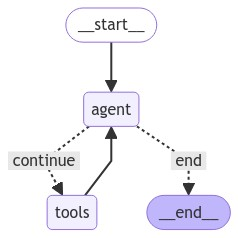

In [12]:
from IPython.display import Image, display

display(Image(coding_graph.get_graph().draw_mermaid_png()))

In [13]:
system_prompt = """You are an AI assistant tasked with creating a detailed code base to answer user questions. You have access to the following tools:

create_doc: Create a blank document in a folder within the documents directory.
append_to_doc: Append text to an existing document in the specified thread folder.
folder_exists: Check if a folder with the given thread ID exists in the documents directory.
DuckDuckGoSearch: A search engine for answering questions about current events or the current state of the world.

First, check if a folder for this thread already exists using the folder_exists function.
If the folder doesn't exist (function returns False), create the folder.
Create a folder structure that includes the files needed for the code. Some of the files that should be created are:

Create a new file named "main" with the appropriate extension for the chosen language (e.g., .py for Python, .js for JavaScript, .java for Java) in the folder using create_doc.
Create a new file named "utils" with the appropriate extension in the folder using create_doc.
Create a new file for dependency management, if applicable to the language (e.g., requirements.txt for Python, package.json for JavaScript, pom.xml for Java) using create_doc.

If the folder already exists (function returns True), you'll be appending to the existing files.
For each file, use the append_to_doc function to add the necessary code.
When writing the code, consider the following:

In the main file, include the main logic to answer the user's question.
In the utils file, include any helper functions or classes that might be needed.
In the dependency management file, list any external libraries or packages that need to be installed.

If you need to search for current information to answer the user's question, use the DuckDuckGoSearch function.
After creating or updating the files, provide a summary of the code base and how it answers the user's question and put it in a README.md file. Use the following format for your final output:
<answer>
[Provide a brief explanation of how the code answers the user's question]
Files created/updated:

main.[extension]: [Brief description of contents]
utils.[extension]: [Brief description of contents]
[dependency file]: [List of required libraries/packages]

To run the code:

[Instructions for installing dependencies, if applicable]
[Instructions for running the main script]
</answer>


Remember to use proper syntax and best practices for the chosen programming language when writing the code. Make sure the code is well-commented and easy to understand.
When implementing this prompt, replace [extension] with the appropriate file extension for the chosen language, and adjust the dependency management file and running instructions according to the specific language and environment.
"""

In [14]:
question = """Write a flask application that uses celery to hit the below api and displays the result in a webpage:
API Documentation
Base URL for all endpoints https://cat-fact.herokuapp.com

The response time will likely be a few seconds long on the first request, because this app is running on a free Heroku dyno. Subsequent requests will behave as normal.

Endpoints
/facts Retrieve and query facts

/users* Get user data

* Requires authentication. As of now, this can only be achieved by logging in manually on the website.

Models
Fact An animal fact

User A user of the Cat Facts site"""

In [15]:
import random

thread_id = ''.join(str(random.randint(0, 9)) for _ in range(4))
#question = "Write a code to print the fibonacii series"
user_prompt = f"thread_id = {thread_id} question = {question}"
inputs = {"messages": [("system", system_prompt),("user", user_prompt)]}
coding_graph.invoke(inputs, stream_mode="values")

{'messages': [SystemMessage(content='You are an AI assistant tasked with creating a detailed code base to answer user questions. You have access to the following tools:\n\ncreate_doc: Create a blank document in a folder within the documents directory.\nappend_to_doc: Append text to an existing document in the specified thread folder.\nfolder_exists: Check if a folder with the given thread ID exists in the documents directory.\nDuckDuckGoSearch: A search engine for answering questions about current events or the current state of the world.\n\nFirst, check if a folder for this thread already exists using the folder_exists function.\nIf the folder doesn\'t exist (function returns False), create the folder.\nCreate a folder structure that includes the files needed for the code. Some of the files that should be created are:\n\nCreate a new file named "main" with the appropriate extension for the chosen language (e.g., .py for Python, .js for JavaScript, .java for Java) in the folder using c

In [16]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

In [18]:
import random

thread_id = ''.join(str(random.randint(0, 9)) for _ in range(4))
#question = "Write a code to print the fibonacii series"
user_prompt = f"thread_id = {thread_id} question = {question}"
inputs = {"messages": [("system", system_prompt),("user", user_prompt)]}
config = {"recursion_limit": 50}
print_stream(coding_graph.stream(inputs,config, stream_mode="values"))

================================ Human Message =================================

thread_id = 8582 question = Write a flask application that uses celery to hit the below api and displays the result in a webpage:
API Documentation
Base URL for all endpoints https://cat-fact.herokuapp.com

The response time will likely be a few seconds long on the first request, because this app is running on a free Heroku dyno. Subsequent requests will behave as normal.

Endpoints
/facts Retrieve and query facts

/users* Get user data

* Requires authentication. As of now, this can only be achieved by logging in manually on the website.

Models
Fact An animal fact

User A user of the Cat Facts site
================================== Ai Message ==================================

[{'text': "Certainly! I'll create a Flask application that uses Celery to hit the Cat Facts API and display the results on a webpage. Let's start by setting up the necessary files and structure for this project.", 'type': 'text'